# Lesson № 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

## Basic SVM


### Метод опорних векторів (Support Vector Machine, SVM) - це алгоритм машинного навчання для класифікації та регресії, який працює шляхом знаходження гіперплощини, що найкраще розділяє два або більше класи даних.



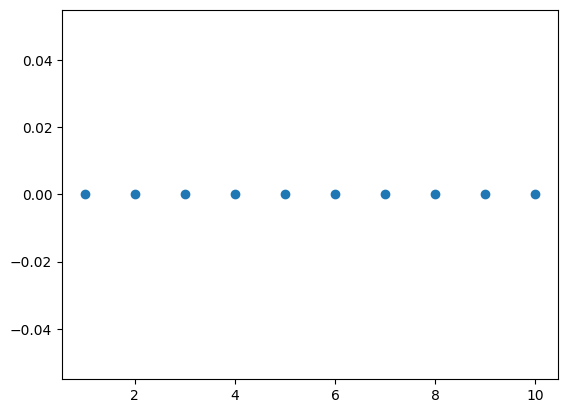

In [6]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,0,1,1,1,1,1])

plt.scatter(x,y=[0 for i in x], c=y)
plt.show()

с=y Это просто устанавливает цвет на основании у  
y=[0 for i in x] это список с нулями на осе х

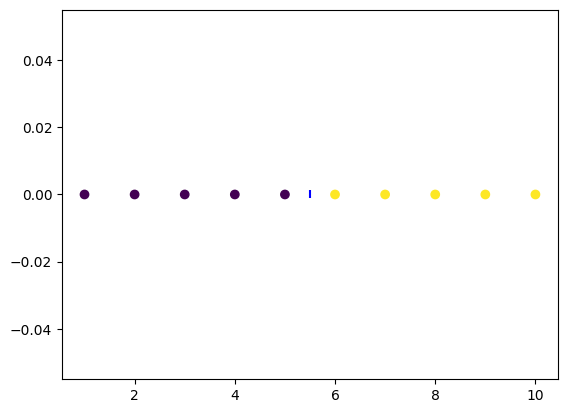

In [5]:
clf = svm.SVC(kernel="linear")
clf.fit(x.reshape(-1,1), y)
plt.scatter(x, y=[0 for i in x], c=y)
xx = -clf.intercept_[0] + 0*clf.coef_[0][0]
plt.scatter(xx, 0, c="b", marker = "|")
plt.show()

svm.SVC(kernel="linear") создает модель SVM с линейным ядром.  
clf.fit(x.reshape(-1, 1), y) обучает модель на данных x и метках y. Метод reshape(-1, 1) преобразует массив x в двумерный массив с одной колонкой, чтобы соответствовать требуемому формату входных данных для модели SVM.

clf.intercept_[0] — это сдвиг гиперплоскости (перехват).  
clf.coef_[0][0] — это коэффициент перед переменной x в уравнении гиперплоскости.
xx вычисляется как точка пересечения гиперплоскости с осью X. Здесь учитывается уравнение гиперплоскости в форме w * x + b = 0, где w — это коэффициент, а b — перехват.

plt.scatter(xx, 0, c="b", marker="|") отображает точку пересечения гиперплоскости с осью X как синюю вертикальную черту.

b = clf.intercept_[0]  # Перехват  
w1 = clf.coef_[0][0]  # Коэффициент перед x  
xx = -b / w1  # Точка пересечения с осью X  

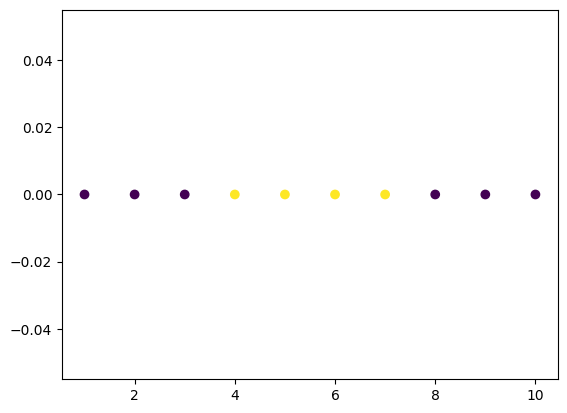

In [7]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,1,1,1,1,0,0,0])

plt.scatter(x,y=[0 for i in x], c=y)
plt.show()

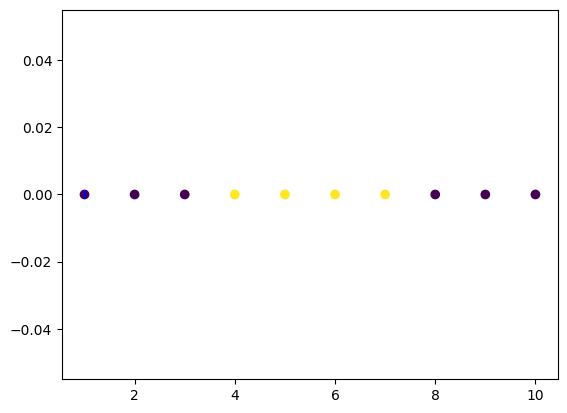

In [8]:
clf = svm.SVC(kernel="linear")
clf.fit(x.reshape(-1,1), y)
plt.scatter(x, y=[0 for i in x], c=y)
xx = -clf.intercept_[0] + 0*clf.coef_[0][0]
plt.scatter(xx, 0, c="b", marker = "|")
plt.show()

В нелінійній залежності дана модель на впоралась.


## Kernel trick


Kernel Trick (трюк ядра) — это метод, используемый в алгоритмах машинного обучения, таких как Support Vector Machines (SVM), для решения нелинейных задач классификации и регрессии. Суть Kernel Trick заключается в том, чтобы преобразовать исходное пространство признаков в пространство более высокой размерности, где данные становятся линейно разделимыми, без явного вычисления координат в этом пространстве.

In [9]:
xs2 = x*x
print(xs2)
x_aug =np.hstack((x.reshape(-1,1), xs2.reshape(-1,1)))
x_aug

[  1   4   9  16  25  36  49  64  81 100]


array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

np.hstack((...)) горизонтально объединяет эти два столбца, создавая двумерный массив (матрицу) с двумя столбцами:

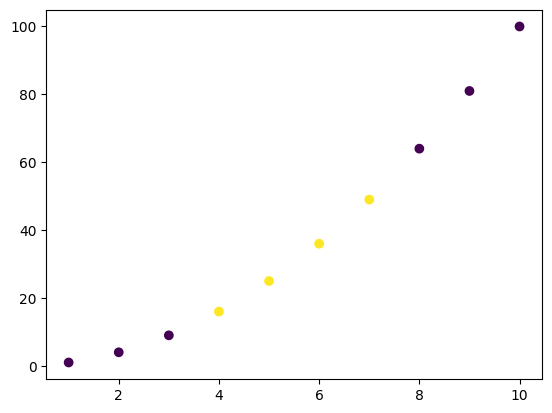

In [10]:
plt.scatter(x, y=xs2, c=y)
plt.show()

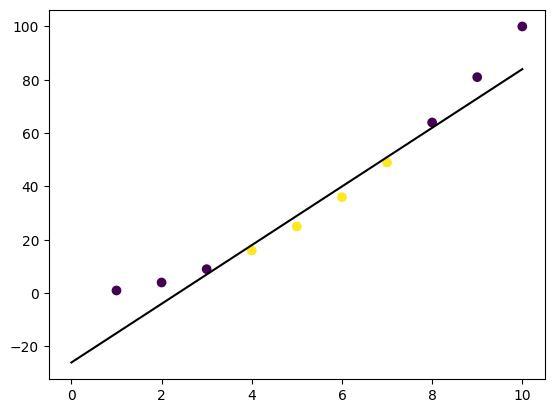

In [17]:
clf = svm.SVC(kernel="linear")
clf.fit(x_aug, y)
plt.scatter(x, y=xs2, c=y)
# Параметры гиперплоскости
w = clf.coef_[0]         # Коэффициенты весов
a = -w[0] / w[1]         # Наклон линии
# Определение и построение линии
xx = np.linspace(0, 10)  # Значения x
yy = a * xx - (clf.intercept_[0]) / w[1]  # Значения y
# Построение линии
plt.plot(xx, yy - 2, "k-")  # Линия смещена вниз на 2 единицы
plt.show()

## Gaussian

In [18]:
def gaussian(x, gamma):
  y = np.mean(x)
  return np.exp(-gamma*(x - y) ** 2)

In [21]:
xga = gaussian(x, gamma=0.14)
x_aug_ga = np.hstack((x.reshape(-1,1), xga.reshape(-1, 1)))
x_aug_ga

array([[ 1.        ,  0.05871853],
       [ 2.        ,  0.17996372],
       [ 3.        ,  0.41686202],
       [ 4.        ,  0.72978887],
       [ 5.        ,  0.96560542],
       [ 6.        ,  0.96560542],
       [ 7.        ,  0.72978887],
       [ 8.        ,  0.41686202],
       [ 9.        ,  0.17996372],
       [10.        ,  0.05871853]])

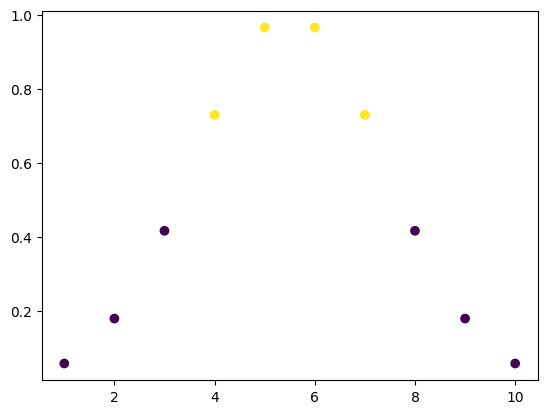

In [22]:
plt.scatter(x, y=xga, c=y)
plt.show()

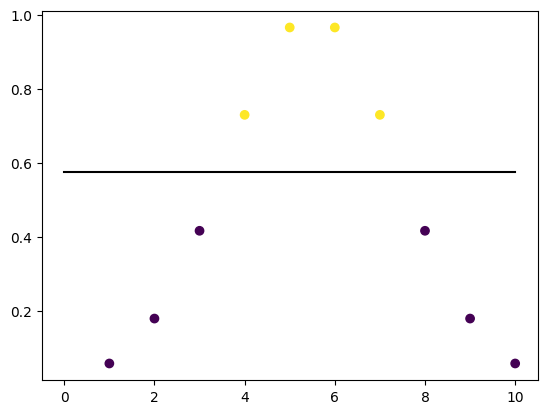

In [24]:
clf = svm.SVC(kernel="linear")
clf.fit(x_aug_ga, y)
plt.scatter(x, y=xga, c=y)


w = clf.coef_[0]
xx = np.linspace(0,10)
yy = (-w[0] / w[1]) * xx - clf.intercept_[0] / w[1]

plt.plot(xx, yy, "k-")
plt.show()


## sklearn realization

In [26]:
clf = svm.SVC(kernel="linear")
clf.fit(x.reshape(-1, 1), y)
clf.predict(x.reshape(-1, 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
clf = svm.SVC(kernel="rbf")
clf.fit(x.reshape(-1, 1), y)
clf.predict(x.reshape(-1, 1))

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [27]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## K nearest neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier


X = [[0], [1], [2], [3]]
y = [0,    0,   1,   1]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

X_test = [[1.6]]
print(knn.predict(X_test))
print(knn.predict_proba(X_test))


[1]
[[0.33333333 0.66666667]]
